In [2]:
%cd ..

%load_ext autoreload
%autoreload 2

/hdd/aouadt/these/projets/3d_segm


In [3]:
from importlib import reload
import random
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn
import torch
from pathlib import Path

import deep_morpho.datasets.select_indexes_dataset as sid
import deep_morpho.datasets.gray_to_channels_dataset as gcd
import deep_morpho.datasets.cifar_dataset as cd
import deep_morpho.datasets.mnist_dataset as md
import deep_morpho.datasets.fashionmnist_dataset as fd
import deep_morpho.datasets.voc_dataset as vd
from deep_morpho.datasets.datamodule_base import DataModule
from deep_morpho.morp_operations import ParallelMorpOperations
from deep_morpho.viz.morp_operations_viz import MorpOperationsVizualiser

def reload_modules():
    for modl in [sid, gcd, cd, md]:
        reload(modl)

reload_modules()

# CIFAR

In [4]:
reload_modules()
dataset = cd.CIFAR100Dataset(levelset_handler_args={"n_values": 10}, indexes=np.arange(10, 3000))
img, tar = dataset[0]

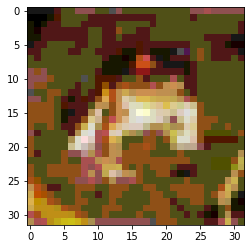

In [23]:
reload_modules()
dataloader = cd.CIFAR10Dataset.get_loader(batch_size=32, train=True,)
imgs, targets = next(iter(dataloader))

plt.imshow(dataloader.dataset.from_channels_to_gray_numpy(imgs[0]))

# MNIST

In [9]:
counts = torch.zeros(10)
dataloader = md.MnistClassifChannelDataset.get_loader(
    batch_size=32, train=True, shuffle=True, levelset_handler_args={"n_values": 1}, apply_one_hot_target=False
)
imgs, targets = next(iter(dataloader))

/hdd/aouadt/these/projets/3d_segm/deep_morpho/datasets/mnist_dataset.py:276: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img=torch.tensor(choice(self.data).unsqueeze(0)),


In [10]:
targets

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],


/hdd/aouadt/these/projets/3d_segm/deep_morpho/datasets/mnist_dataset.py:276: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img=torch.tensor(choice(self.data).unsqueeze(0)),


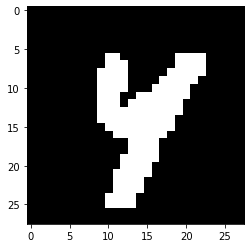

In [4]:
reload_modules()
dataloader = md.MnistClassifChannelDataset.get_loader(batch_size=32, train=True, shuffle=True, levelset_handler_args={"n_values": 1})
imgs, targets = next(iter(dataloader))

plt.imshow(dataloader.dataset.from_channels_to_gray_numpy(imgs[0]), cmap="gray")

In [17]:
imgs[0].shape

torch.Size([5, 28, 28])

In [39]:
rec.shape

(28, 28, 1)

/hdd/aouadt/these/projets/3d_segm/deep_morpho/datasets/mnist_dataset.py:274: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kwargs["img"] = torch.tensor(choice(self.data).unsqueeze(0))


([], [])

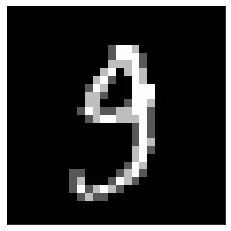

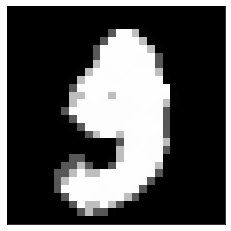

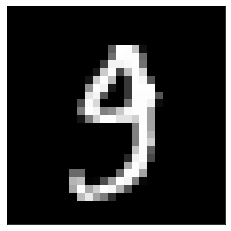

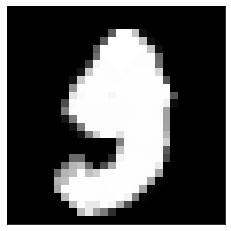

In [4]:
from deep_morpho.datasets.gray_to_channels_dataset import LevelsetValuesEqualIndex
from skimage.morphology import dilation
from general.structuring_elements import bdiamond

selem = bdiamond(5)

reload_modules()
n_values = 5
dataloader = md.MnistClassifChannelDataset.get_loader(
    batch_size=32, train=True, shuffle=True, levelset_handler_args={"n_values": n_values, "levelset_handler_mode": LevelsetValuesEqualIndex}
)
imgs, targets = next(iter(dataloader))

rec = dataloader.dataset.from_channels_to_gray_numpy(imgs[0])[..., 0] / 255
ori = imgs.original[0, ..., 0].cpu().numpy() / 255

dil_rec = dilation(rec, selem)
dil_ori = dilation(ori, selem)

fig1 = plt.figure()
plt.imshow(rec, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])

fig1 = plt.figure()
plt.imshow(dil_rec, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])

fig2 = plt.figure()
plt.imshow(ori, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])

fig2 = plt.figure()
plt.imshow(dil_ori, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])


# fig2, axs = plt.subplots(1, n_values, figsize=(5*n_values, 2))
# for i in range(n_values):
#     axs[i].imshow(imgs[0, i])
#     axs[i].set_xticks([])
#     axs[i].set_yticks([])

In [66]:
imgs.original.shape

torch.Size([32, 28, 28, 1])

In [74]:
imgs.shape

torch.Size([32, 20, 28, 28])

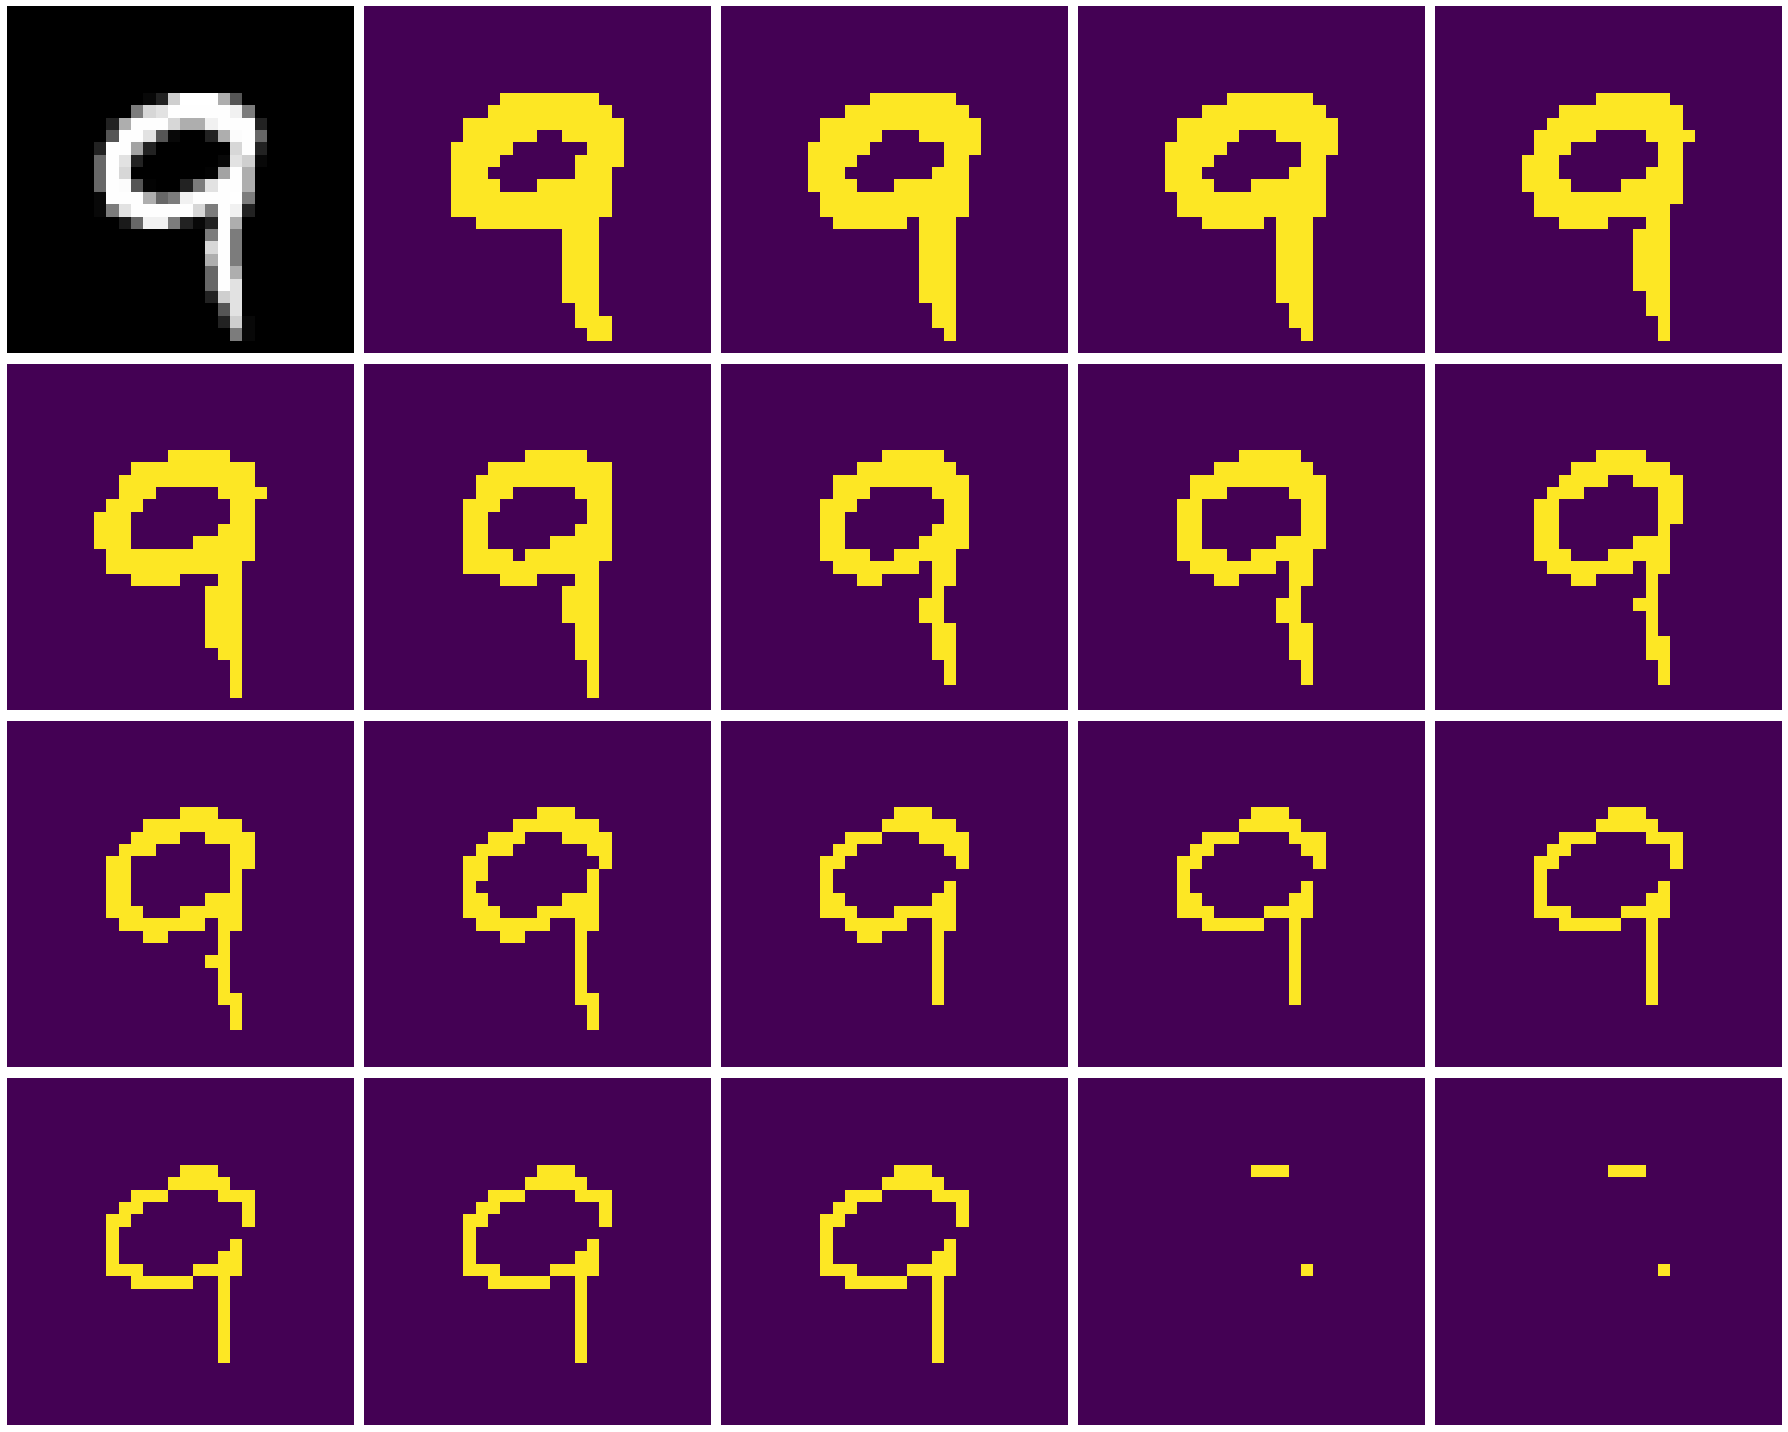

In [94]:
ori = dataloader.dataset.from_channels_to_gray_numpy(imgs[0])
n_levelsets = n_values
n_per_row = 5

rows = n_levelsets // n_per_row + (n_levelsets % n_per_row > 0)
fig, axs = plt.subplots(rows, n_per_row, figsize=(5*n_per_row, 5*rows))  # Adjust figsize as needed

axs = axs.flatten()  # Flatten the array of axes for easier indexing
axs[0].imshow(ori[..., 0], cmap="gray")
axs[0].axis('off')
for idx in range(1, n_values):
    axs[idx].imshow(imgs[0, idx])
    axs[idx].axis('off')

# Hide any unused axes if the last row is not fully occupied
for ax in axs[idx+1:]:
    ax.axis('off')

plt.tight_layout()
#plt.show()


In [45]:
fig1.savefig("mnist_gray.png")
fig2.savefig("mnist_channels.png")

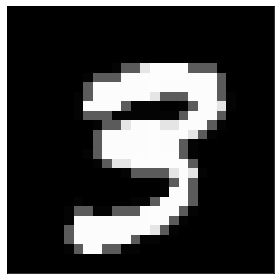

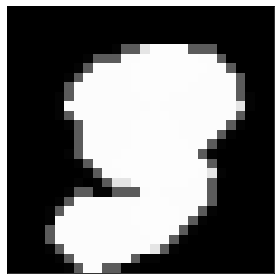

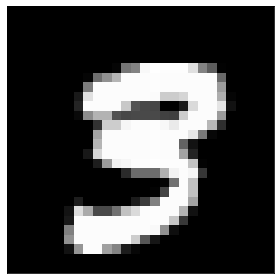

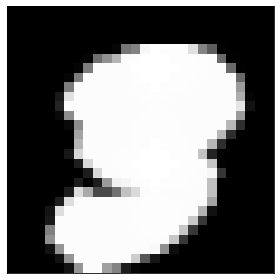

In [6]:
from deep_morpho.datasets.gray_to_channels_dataset import LevelsetValuesEqualIndex
from skimage.morphology import dilation
from general.structuring_elements import bdiamond

selem = bdiamond(5)

path = Path("figures_for_manuscript/chapter2")

reload_modules()
n_values = 5
dataloader = md.MnistClassifChannelDataset.get_loader(
    batch_size=32, train=True, shuffle=True, levelset_handler_args={"n_values": n_values, "levelset_handler_mode": LevelsetValuesEqualIndex}
)
imgs, targets = next(iter(dataloader))

rec = dataloader.dataset.from_channels_to_gray_numpy(imgs[0])[..., 0] / 255
ori = imgs.original[0, ..., 0].cpu().numpy() / 255

dil_rec = dilation(rec, selem)
dil_ori = dilation(ori, selem)

fig1 = plt.figure()
plt.imshow(rec, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
fig1.tight_layout()
fig1.savefig(path / "levelset-morpho-input-rec.png")

fig1 = plt.figure()
plt.imshow(dil_rec, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
fig1.tight_layout()
fig1.savefig(path / "levelset-morpho-dil-rec.png")

fig2 = plt.figure()
plt.imshow(ori, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
fig2.tight_layout()
fig2.savefig(path / "levelset-morpho-input.png")

fig2 = plt.figure()
plt.imshow(dil_ori, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
fig2.tight_layout()
fig2.savefig(path / "levelset-morpho-dil.png")


# fig2, axs = plt.subplots(1, n_values, figsize=(5*n_values, 2))
# for i in range(n_values):
#     axs[i].imshow(imgs[0, i])
#     axs[i].set_xticks([])
#     axs[i].set_yticks([])

In [85]:
reload_modules()

n_trials = 5
all_n_values = range(10, 30, 2)

errors = np.zeros((n_trials, len(all_n_values)))
for n in range(n_trials):
    for j, n_values in enumerate(all_n_values):
        dataset = cd.CIFAR10Dataset(levelset_handler_args={"n_values": n_values})
        img, tar = dataset[0]
        errors[n, j] = ((dataset.from_channels_to_gray(img) - img.original) / (img.original + 1e-5)).abs().mean()



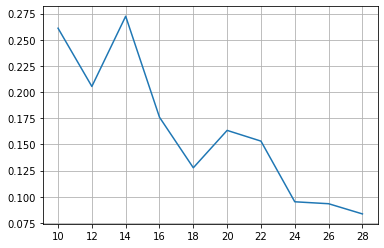

In [87]:
plt.grid('on')
plt.plot(all_n_values, errors.mean(0))
plt.xticks(all_n_values);


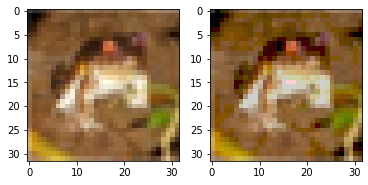

In [67]:
plt.subplot(121)
plt.imshow(img.original.numpy().transpose(1, 2, 0))

plt.subplot(122)
plt.imshow(dataset.from_channels_to_gray(img).numpy().transpose(1, 2, 0))

In [9]:
plt.imshow(img)
plt.title(dataset.classes[tar])

NameError: name 'img' is not defined

# Morpho Mnist

In [220]:
reload_modules()
morp_operation = ParallelMorpOperations.dilation(("dcross", 7))
dataloader = md.MnistGrayScaleDataset.get_loader(batch_size=32, train=True, shuffle=True, morp_operation=morp_operation)
imgs, targets = next(iter(dataloader))



(-0.5, 49.5, 49.5, -0.5)

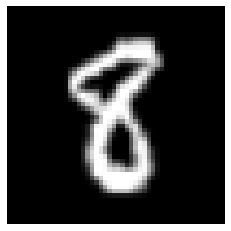

In [221]:
plt.imshow(imgs.original[0, 0], cmap="gray")
plt.axis(False)

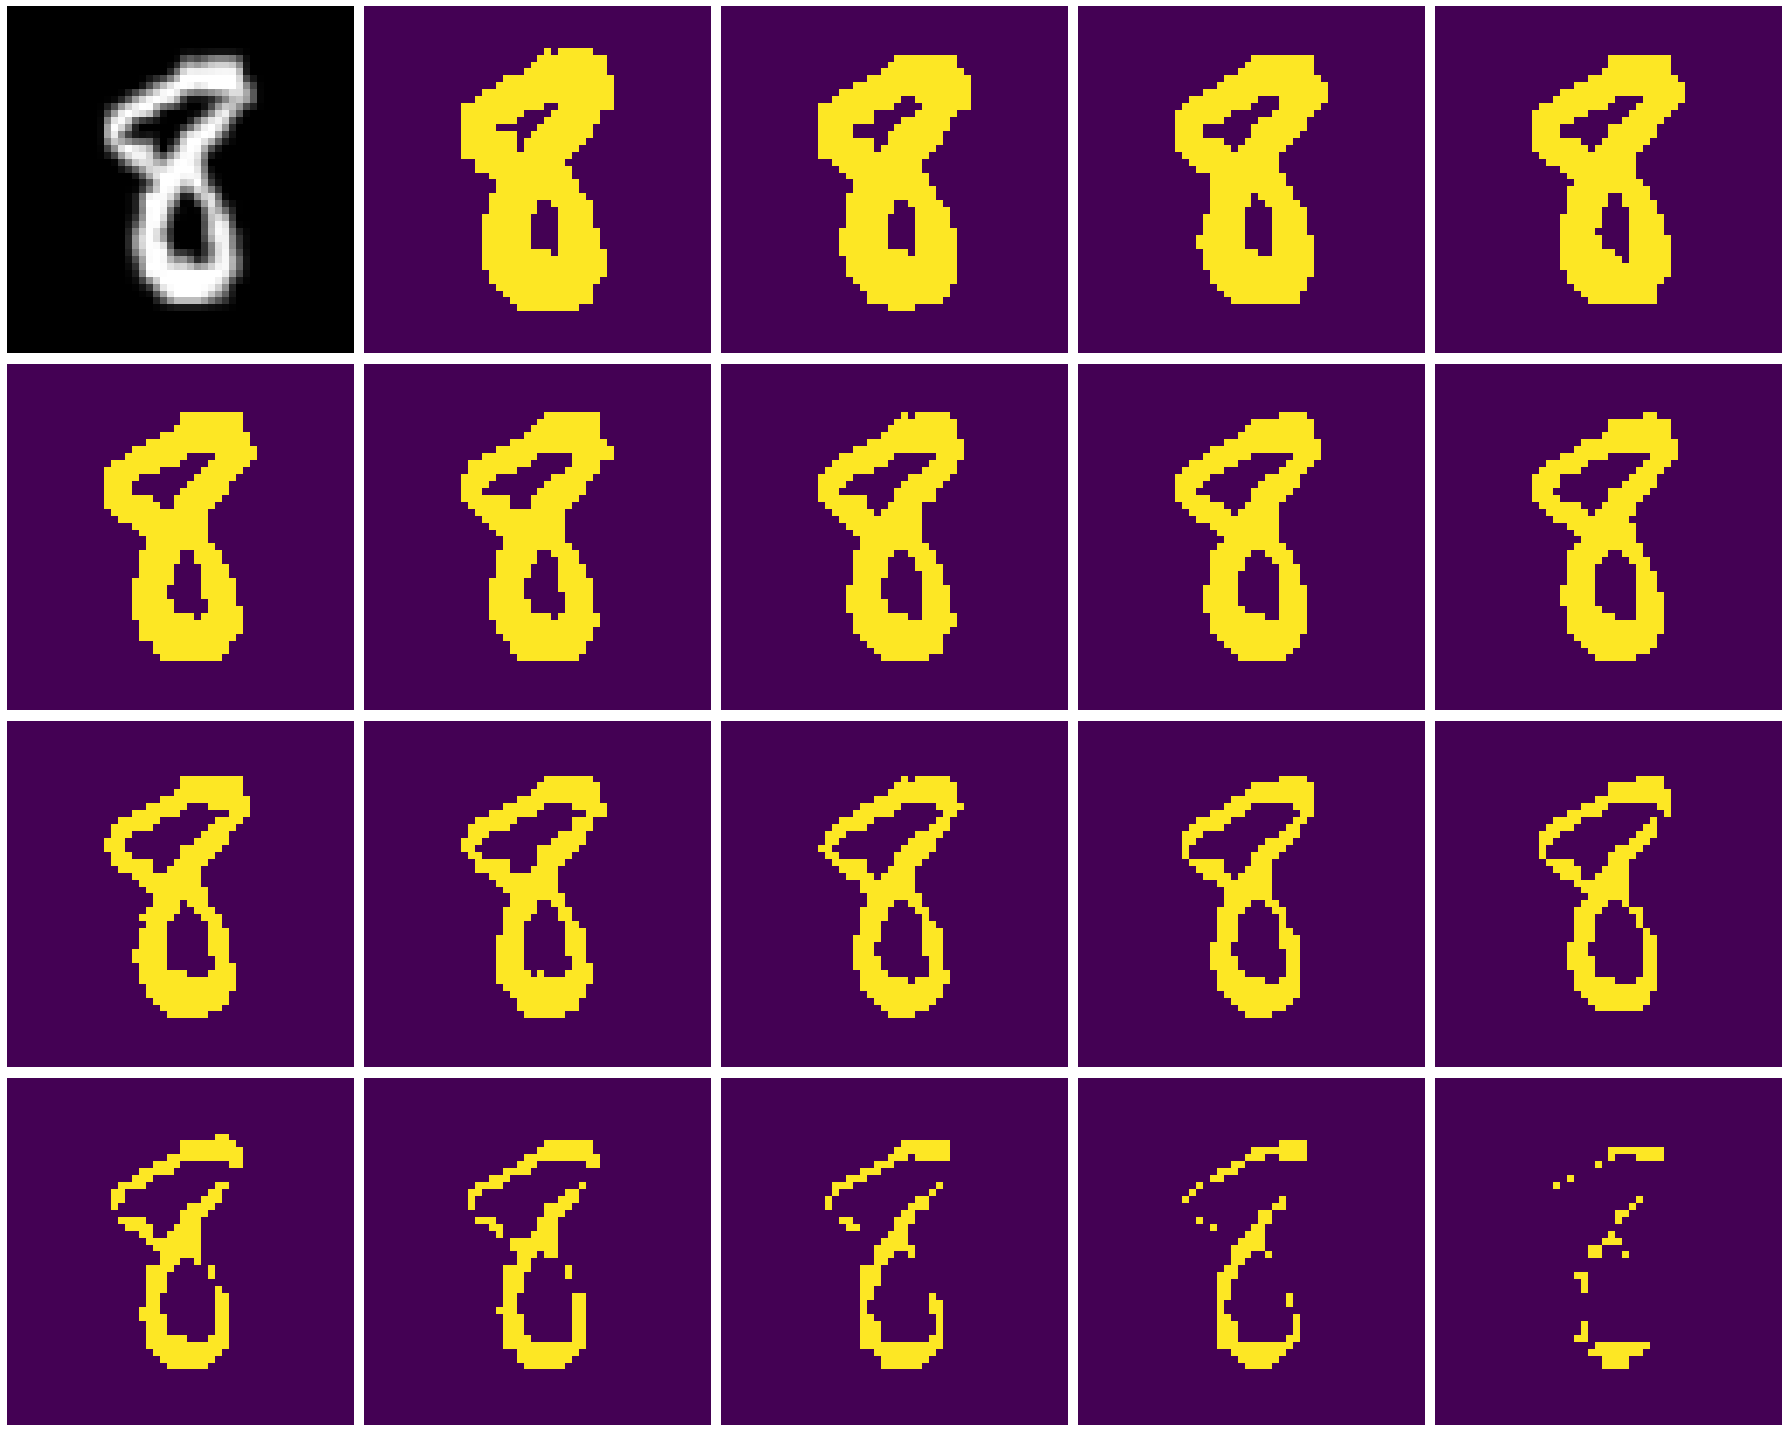

In [223]:
ori = imgs.original
n_levelsets = int(imgs.shape[0] / ori.shape[0])
n_per_row = 5

rows = n_levelsets // n_per_row + (n_levelsets % n_per_row > 0)
fig, axs = plt.subplots(rows, n_per_row, figsize=(5*n_per_row, 5*rows))  # Adjust figsize as needed

axs = axs.flatten()  # Flatten the array of axes for easier indexing
axs[0].imshow(ori[0, 0], cmap="gray")
axs[0].axis('off')
for idx, img in enumerate(imgs[1:n_levelsets]):
    idx = idx+1
    axs[idx].imshow(img[0])
    axs[idx].axis('off')

# Hide any unused axes if the last row is not fully occupied
for ax in axs[idx+1:]:
    ax.axis('off')

plt.tight_layout()
plt.savefig("figures_for_manuscript/mnist_levelsets.png")


# Fashion Mnist

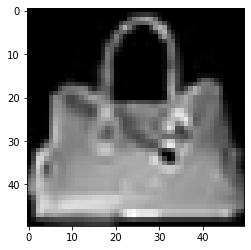

In [207]:
reload_modules()
morp_operation = ParallelMorpOperations.dilation(("dcross", 7))
dataloader = fd.FashionMnistGrayScaleDataset.get_loader(batch_size=32, train=True, shuffle=True, morp_operation=morp_operation)
imgs, targets = next(iter(dataloader))

plt.imshow(imgs.original[0, 0], cmap="gray")


(-0.5, 49.5, 49.5, -0.5)

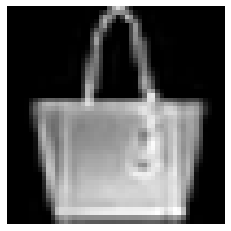

In [156]:
plt.imshow(imgs.original[0, 0], cmap="gray")
plt.axis(False)

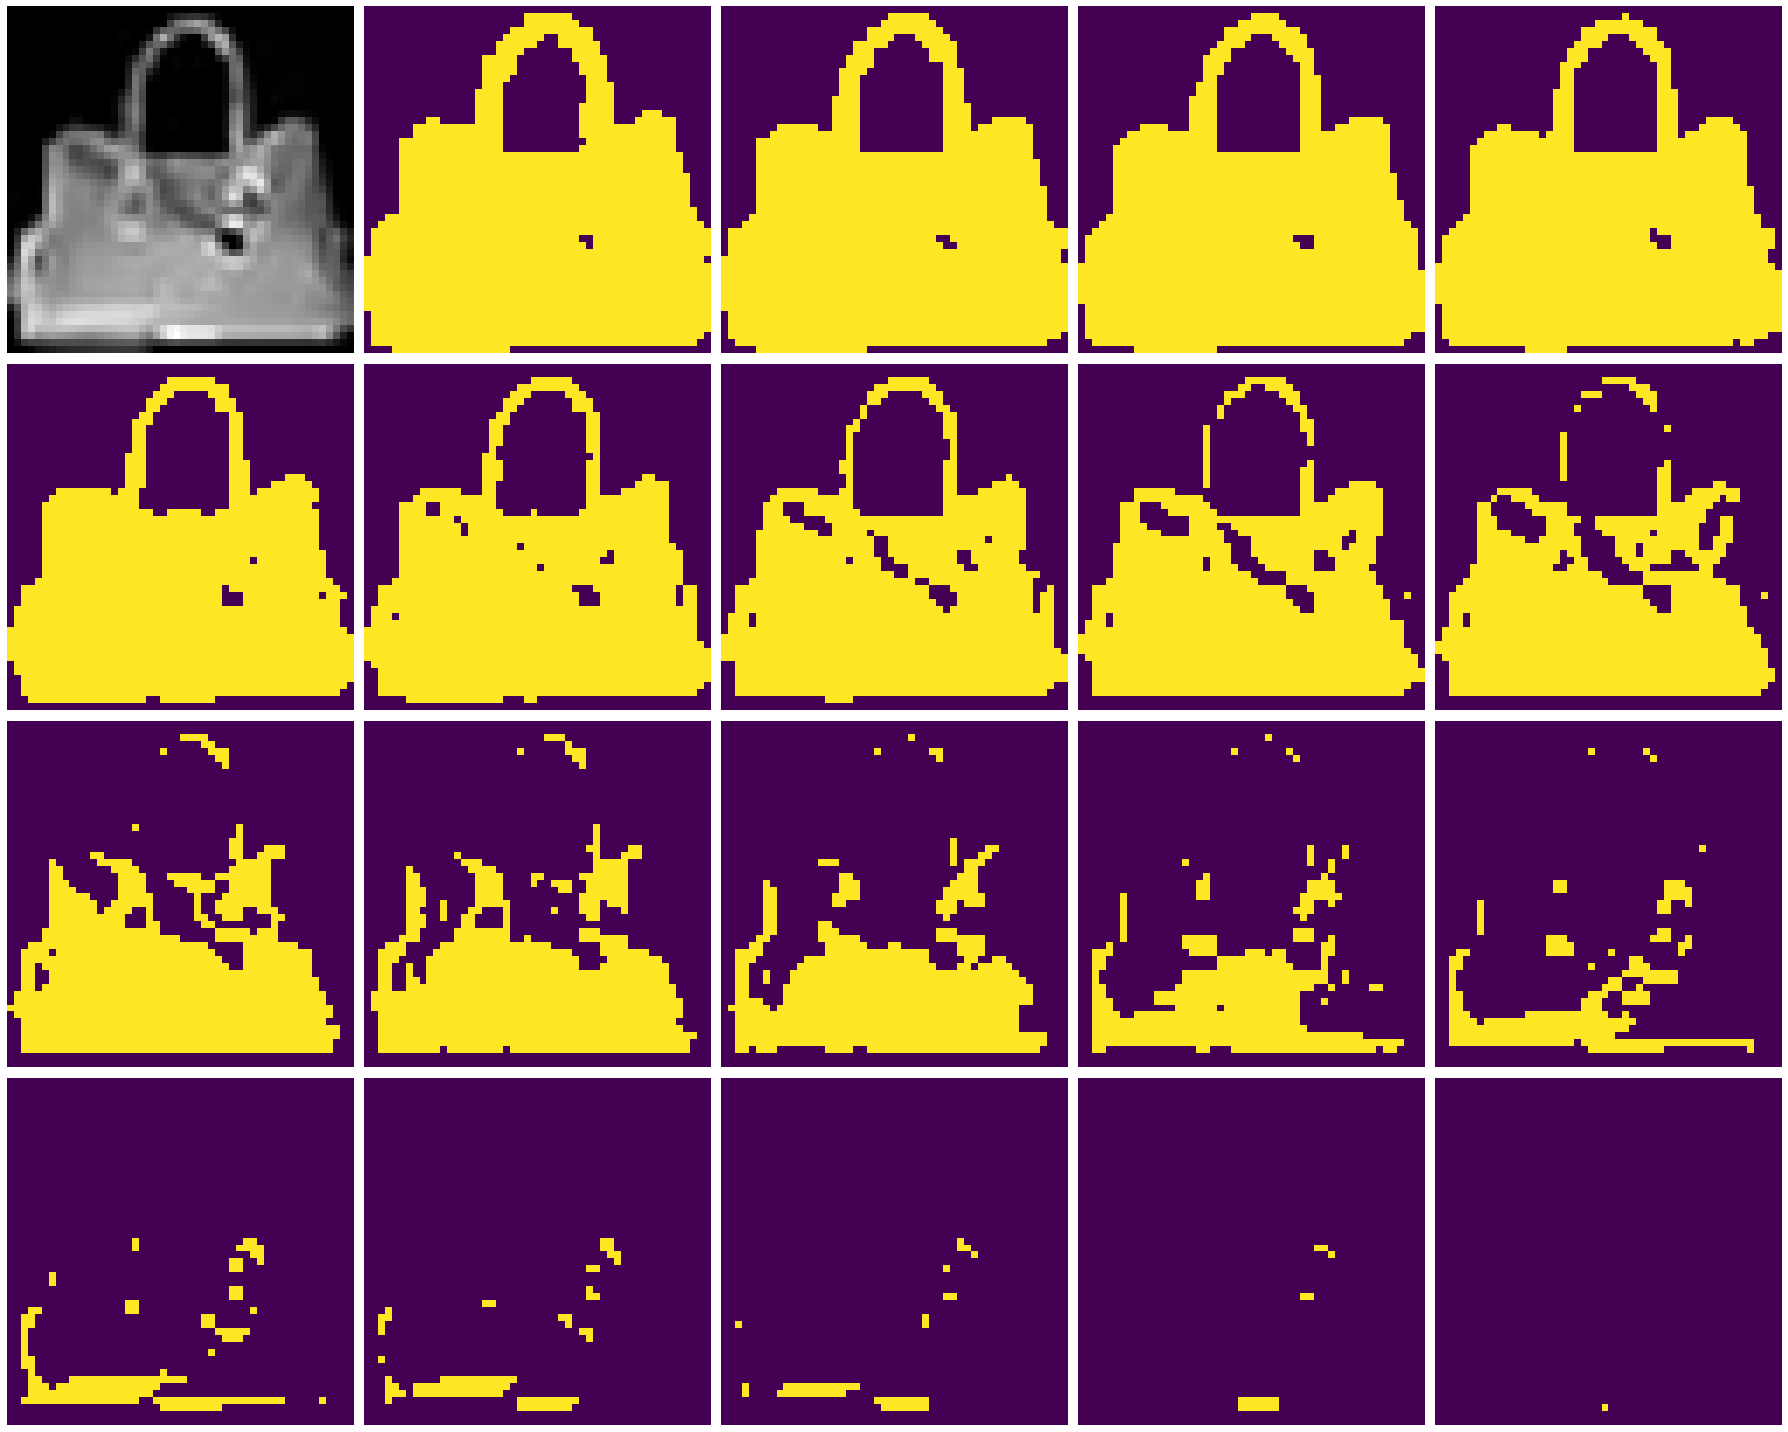

In [208]:
ori = imgs.original
n_levelsets = int(imgs.shape[0] / ori.shape[0])
n_per_row = 5

rows = n_levelsets // n_per_row + (n_levelsets % n_per_row > 0)
fig, axs = plt.subplots(rows, n_per_row, figsize=(5*n_per_row, 5*rows))  # Adjust figsize as needed

axs = axs.flatten()  # Flatten the array of axes for easier indexing
axs[0].imshow(ori[0, 0], cmap="gray")
axs[0].axis('off')
for idx, img in enumerate(imgs[1:n_levelsets]):
    idx = idx+1
    axs[idx].imshow(img[0])
    axs[idx].axis('off')

# Hide any unused axes if the last row is not fully occupied
for ax in axs[idx+1:]:
    ax.axis('off')

plt.tight_layout()
plt.savefig("figures_for_manuscript/fashionmnist_levelsets.png")


# Pascal VOC Segmentation

In [19]:
from torchvision.datasets import VOCSegmentation

with open("deep_morpho/datasets/root_vocsegmentation_dir.txt", "r") as f:
    root_voc = f.read()

In [3]:
def plot_img_mask_on_ax(img, mask, alpha=.7, ax=None):
    if ax is None:
        ax = plt.gca()

    masked = np.ma.masked_where(mask == 0, mask)
    ax.imshow(img, cmap='gray')
    ax.imshow(masked, cmap='jet', alpha=alpha, interpolation='nearest')


In [192]:
# dataset = VOCSegmentation(root_voc, year="2012", image_set="val", download=False)
dataset = vd.VOCSegmentationClassical(image_set="val")


class Args:
    trainset_args_suffix = "_train"
    valset_args_suffix = "_val"
    testset_args_suffix = "_test"

    n_inputs_train = 2000
    n_inputs_val = 100
    n_inputs_test = 100

    batch_size = 2
    num_workers = 0

    def __getitem__(self, key):
        return getattr(self, key)
    
    def trainset_args(self): return {}
    def valset_args(self): return {}
    def testset_args(self): return {}


class ExpDummy:
    args = Args()


trainloader, valloader, testloader = vd.VOCSegmentationClassical.get_train_val_test_loader_from_experiment(ExpDummy)
# dataloader = vd.VOCSegmentationClassical.get_loader(batch_size=1, train=False, shuffle=False)

In [161]:
for _ in tqdm(trainloader):
    pass

for _ in tqdm(valloader):
    pass

for _ in tqdm(testloader):
    pass

  0%|          | 0/831 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

[ 0 20]
['background', 'tv monitor']


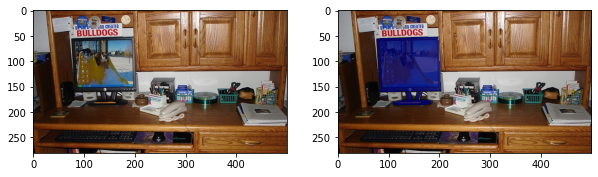

In [245]:
img, tar = next(iter(trainloader))
img = img[0]
tar = tar[0]


tarar_ori = np.asarray(tar)[0] + 0
tarar = tarar_ori + 0
imgar = np.asarray(img).transpose(1, 2, 0) + 0

print(np.unique(tarar_ori))
print([dataset.CLASSES[i] for i in np.unique(tarar_ori)])

# tarar[tarar==255] = 0
for val_idx, val in enumerate(np.unique(tarar)):
    tarar[tarar == val] = val_idx
    max_val = val_idx

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(121)
plt.imshow(imgar)

ax = fig.add_subplot(122)
plot_img_mask_on_ax(imgar, tarar, ax=ax)



In [252]:
tar.shape

torch.Size([1, 281, 500])

In [259]:
perfect_otp = torch.zeros(tar.shape[0], 21, tar.shape[1], tar.shape[2], dtype=torch.float32)
for i in range(perfect_otp.shape[1]):
    perfect_otp[:, i, :, :] = (tar == i).float()

In [285]:
perfect_otp.shape

torch.Size([1, 21, 281, 500])

20


Text(0.5, 1.0, 'tensor(13553)')

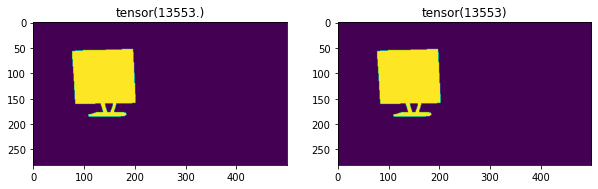

In [310]:
i = random.choice(tar.unique()).item()
print(i)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(perfect_otp[0, i, :, :])
plt.title(perfect_otp[0, i, :, :].sum())

plt.subplot(122)
plt.imshow(tar[0, :, :] == i)
plt.title((tar[0, :, :] == i).sum())

In [312]:
print(nn.CrossEntropyLoss()(perfect_otp, tar.long()))
print(nn.NLLLoss()(perfect_otp.log(), tar.long()))

tensor(2.1232)
tensor(0.)


In [132]:
resolutions = []
for img in tqdm(dataset.images):
    # Image.open(img)
    resolutions.append(Image.open(img).size)


  0%|          | 0/1464 [00:00<?, ?it/s]

1115
[0 8]
['background', 'cat']


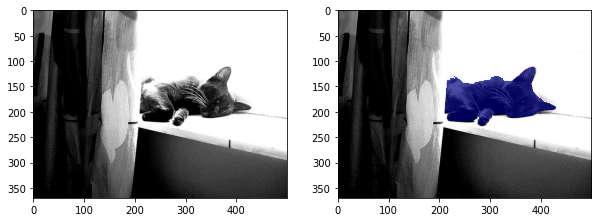

In [120]:
idx = np.random.randint(0, len(dataset))
print(idx)

img, tar = dataset[idx]
# display(img)
# display(tar)

tarar_ori = np.asarray(tar)[0] + 0
tarar = tarar_ori + 0
imgar = np.asarray(img).transpose(1, 2, 0) + 0

print(np.unique(tarar_ori))
print([dataset.CLASSES[i] for i in np.unique(tarar_ori)])

# tarar[tarar==255] = 0
for val_idx, val in enumerate(np.unique(tarar)):
    tarar[tarar == val] = val_idx
    max_val = val_idx

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(121)
plt.imshow(imgar)

ax = fig.add_subplot(122)
plot_img_mask_on_ax(imgar, tarar, ax=ax)



In [63]:
np.unique(tarar_ori)

array([  0,   4,  15, 255], dtype=uint8)

# NoiSti

In [19]:
dataloader1 = DataModule.select("noistidataset").get_loader(
    batch_size=5,
    n_inputs=1000,
    angles=[0, 45, 90],
    **{
        "size": (70, 70),
        "n_shapes": 30,
        "lengths_lim": (12, 15),
        "widths_lim": (0, 0),
        "p_invert": 0,
        "border": (0, 0),
        "noise_proba": 0.1,
    }
)

dataloader2 = DataModule.select("noistidataset").get_loader(
    batch_size=20,
    n_inputs=1000,
    angles=np.arange(0, 180, 10),
    **{
        "size": (70, 70),
        "n_shapes": 30,
        "lengths_lim": (12, 15),
        "widths_lim": (0, 0),
        "p_invert": 0,
        "border": (0, 0),
        "noise_proba": 0.1,
    }
)

In [58]:
dataloader1.dataset.default_morp_operation.selems[0][0][0].shape

(11, 11)

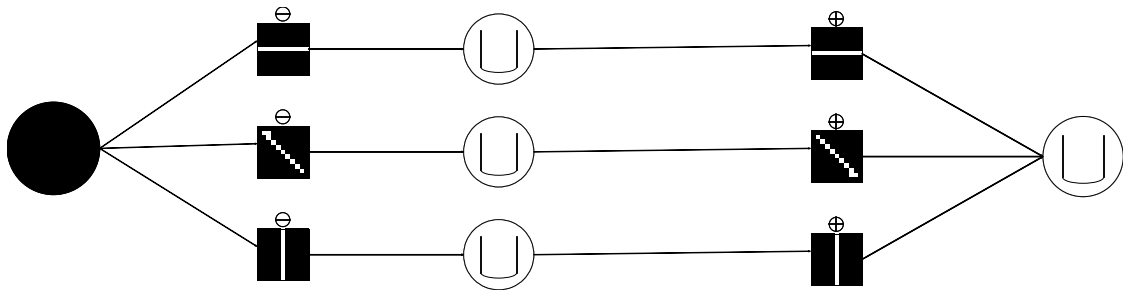

In [31]:
MorpOperationsVizualiser(dataloader1.dataset.default_morp_operation).draw(figsize=(20, 20))
MorpOperationsVizualiser(dataloader1.dataset.default_morp_operation).save_fig(
    savepath="figures_for_manuscript/noisti/noisti_morp_operation.png",
    figsize=(20, 20)
)

In [20]:
img1, target1 = next(iter(dataloader1))
img2, target2 = next(iter(dataloader2))

imgs = torch.cat([img1, img2], 0)
targets = torch.cat([target1, target2], 0)

In [22]:
n_per_row = 4
rows = 7

path_save = Path("figures_for_manuscript/noisti")
path_save.mkdir(exist_ok=True, parents=True)

for idx, (img, tar) in enumerate(zip(imgs, targets)):
    fig = plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.imshow(img[0], cmap="gray")
    plt.axis(False)

    plt.subplot(122)
    plt.imshow(tar[0], cmap="gray")
    plt.axis(False)

    plt.tight_layout()
    plt.savefig(path_save / f"noisti_{idx}.png")
    plt.close(fig)

# fig, axs = plt.subplots(rows, n_per_row, figsize=(5*n_per_row, 5*rows))  # Adjust figsize as needed

# axs = axs.flatten()  # Flatten the array of axes for easier indexing
# for idx in range(n_per_row * rows):
#     axs[idx].imshow(img[idx, 0])
#     axs[idx].axis('off')

# # Hide any unused axes if the last row is not fully occupied
# for ax in axs[idx+1:]:
#     ax.axis('off')

# plt.tight_layout()
# plt.savefig("figures_for_manuscript/fashionmnist_levelsets.png")


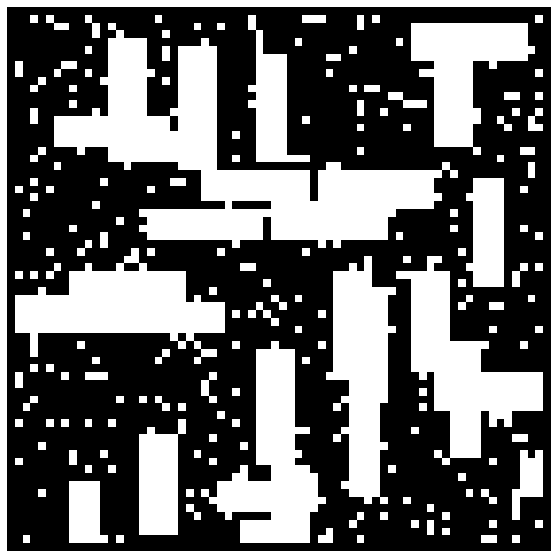

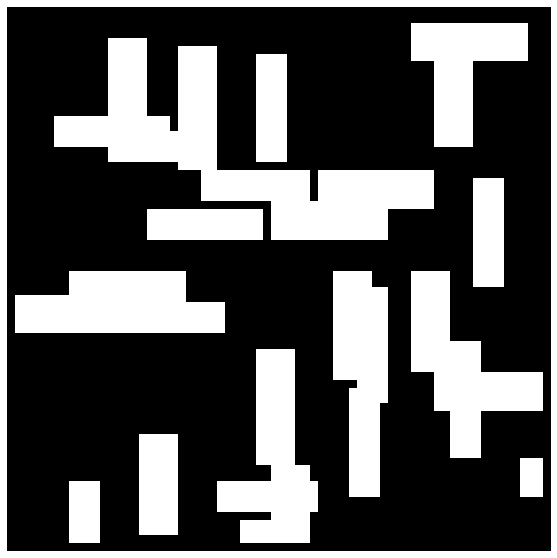

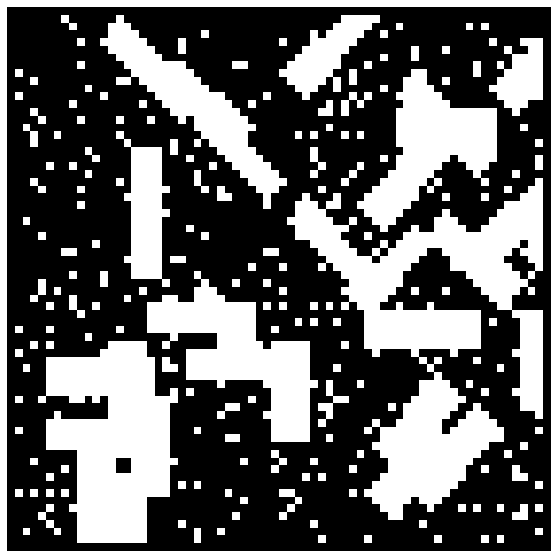

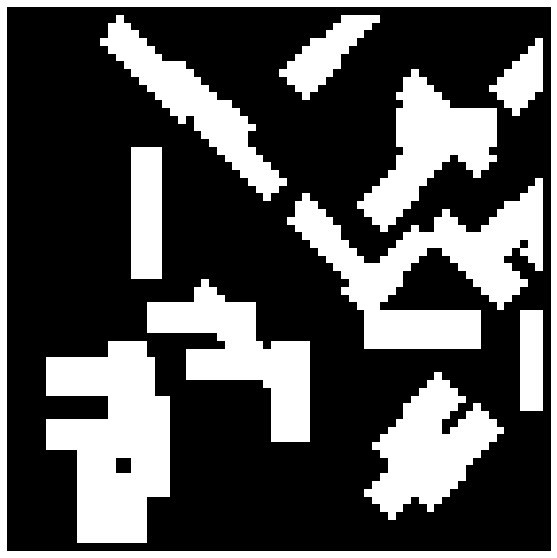

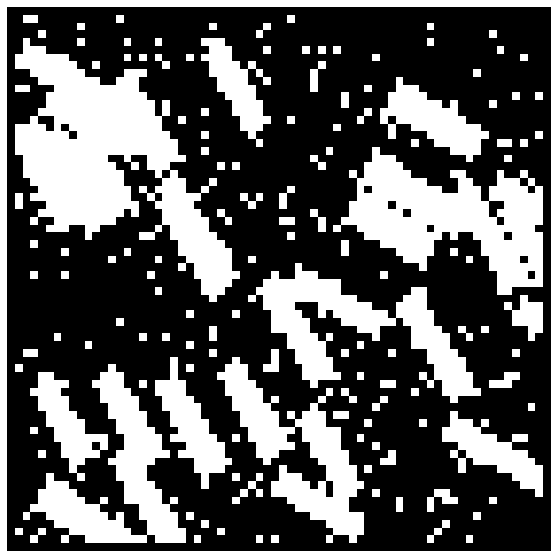

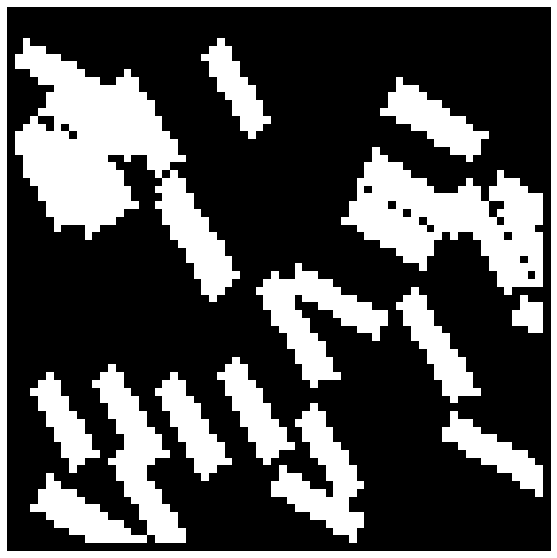

In [53]:
angle_sets = [
    [0, 90],
    [0, 45, 90, 135],
    [30, 60],
]
names = ["theta1", "theta2", "theta3"]

for angles, name in zip(angle_sets, names):

    dataloader1 = DataModule.select("noistidataset").get_loader(
        batch_size=1,
        n_inputs=1000,
        angles=angles,
        **{
            "size": (70, 70),
            "n_shapes": 30,
            "lengths_lim": (12, 15),
            "widths_lim": (3, 4),
            "p_invert": 0,
            "border": (1, 1),
            "noise_proba": 0.1,
        }
    )

    img, tar = next(iter(dataloader1))
    plt.figure(figsize=(10, 10))
    plt.imshow(img[0, 0], cmap="gray")
    plt.axis(False)
    plt.savefig(f"figures_for_manuscript/noisti/noisti_width3_{name}_1.png")
    # put rectangle around the image

    plt.figure(figsize=(10, 10))
    plt.imshow(tar[0, 0], cmap="gray")
    plt.axis(False)
    plt.savefig(f"figures_for_manuscript/noisti/noisti_width3_{name}_2.png")

